In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
X = np.array(dataset.iloc[:,1:-1])
y = np.array(dataset.iloc[:,-1])

In [8]:
print(X)
X.shape

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


(10, 1)

In [9]:
print(y)
y.shape

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


(10,)

In [10]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training SVR model on the whole dataset

In [13]:
from sklearn.svm import SVR
regressor= SVR(kernel = 'rbf')
#X, y di sini adalah X, y yang sudah mengalami tarnsformasi Scaling
regressor.fit(X,y)

C:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [14]:
print(regressor.predict(sc_X.transform([[6.5]])))

[-0.27861589]


In [15]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

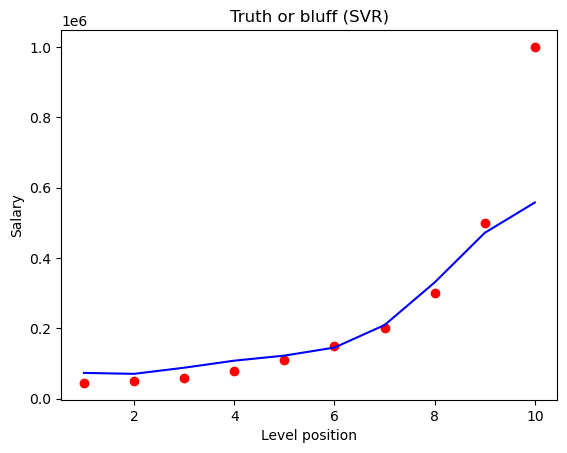

In [18]:
# grafik scatter
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
# grafik linier regresi
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title('Truth or bluff (SVR)')
plt.xlabel('Level position')
plt.ylabel('Salary')
plt.show()

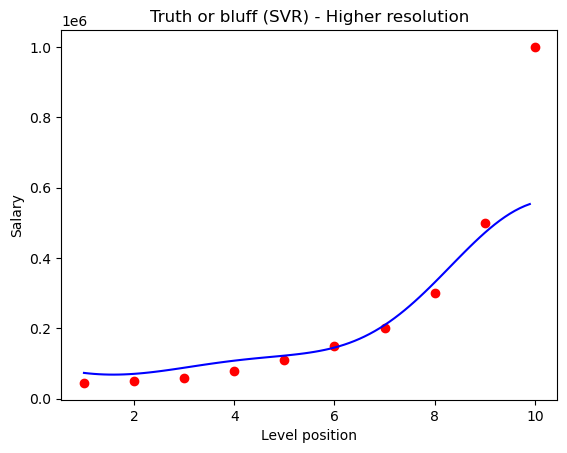

In [19]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
#plt.scatter(X, y, color = "red")
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Truth or bluff (SVR) - Higher resolution')
plt.xlabel('Level position')
plt.ylabel('Salary')
plt.show()